# Experimento 3 - Atividade 2

In [332]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.optimize import curve_fit

In [333]:
sns.set_theme()
plt.rcParams['figure.dpi'] = 120

## Modelo teórico

O deslocamento horizontal do feixe $h_B$ é:

$$ h_B = C \frac{i}{\sqrt{V_{AC}}} $$

onde, $i$ é a corrente nas bobinas que geram o campo magnético, $V_{AC}$ é a tensão de aceleração do feixe e $C$ é uma constante dependente da geometrias do TRC.

## Tensão de Aceleração Fixa

$$ h_B = \frac{C}{R\sqrt{V_{AC}}} V_D \Rightarrow a = \frac{C}{R \sqrt{V_{AC}}} $$

In [334]:
Vac, sVac	= 681, 5
R, sR		= 63.3, 0.5

In [335]:
df_accel = pd.read_csv('dados/ac_fixa.csv', decimal=',', sep='\t')

In [336]:
N = df_accel.shape[0]
xdata = df_accel['Tensão de deflexão (V)']
ydata = df_accel['Deslocamento (mm)']

In [337]:
popt, pcov = curve_fit(
	lambda x, a, b: a * x + b,
	xdata=df_accel['Tensão de deflexão (V)'],
	ydata=df_accel['Deslocamento (mm)'],
	sigma=df_accel['Inc. Deslocamento (mm)']
)

In [338]:
df_accel['Resíduos'] = (df_accel['Deslocamento (mm)'] - popt[0] * df_accel['Tensão de deflexão (V)'] - popt[1] ) / df_accel['Inc. Deslocamento (mm)']

In [339]:
# Cálculo do intervalo de confiança
S_xy    = np.sqrt( np.mean(( ydata - popt[0] * xdata - popt[1] )**2) )
S_xx    = np.std(xdata)**2
t_crit  = 1

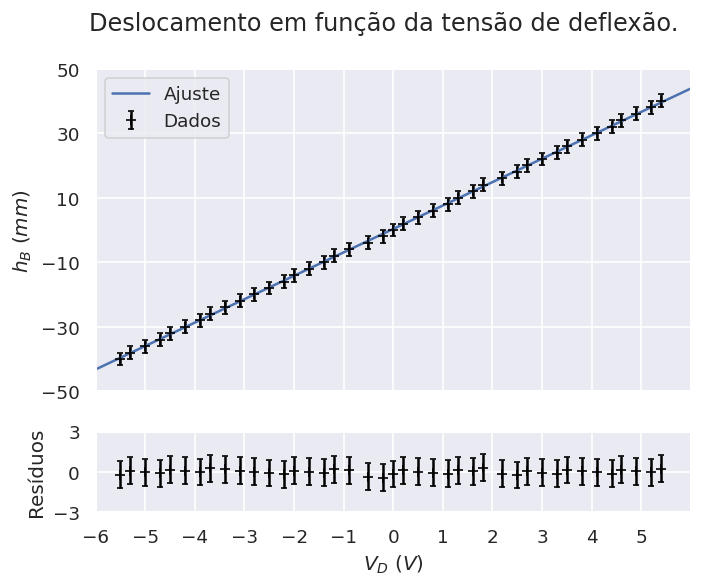

In [340]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={ 'height_ratios': (4,1) })
plt.suptitle('Deslocamento em função da tensão de deflexão.')

axs[0].errorbar(
	x=df_accel['Tensão de deflexão (V)'],
	y=df_accel['Deslocamento (mm)'],
	yerr=df_accel['Inc. Deslocamento (mm)'],
	fmt=' ', marker='+', color='black', capsize=2, label='Dados'
)

x = np.linspace(-6, 6, 100)
y = popt[0]*x + popt[1]

delta = t_crit * S_xy * np.sqrt(1 + 1 / N + (x - np.mean(xdata))**2 / S_xx )

sns.lineplot(x=x, y=y, ax=axs[0], label=f'Ajuste')
# axs[0].fill_between(x=x, y1=y-delta, y2=y+delta, color='blue', alpha=0.3)

axs[1].errorbar(
	x=df_accel['Tensão de deflexão (V)'],
	y=df_accel['Resíduos'],
	yerr=1,
	fmt=' ', marker='+', color='black', capsize=2, label='Dados'
)

axs[0].set(ylabel='$h_B$ ($mm$)', ylim=(-50, 50), yticks=np.arange(-50, 51, 20))
axs[1].set(xlabel='$V_D$ ($V$)', ylabel='Resíduos', xlim=(-6, 6), ylim=(-3, 3), xticks=np.arange(-6, 6, 1), yticks=[-3, 0, 3])

axs[0].legend()

plt.savefig('plots/aceleracao_fixa.png', dpi=300, bbox_inches='tight')
plt.show()

In [341]:
N

41

In [342]:
popt, np.sqrt(pcov)

(array([7.25810749, 0.31864864]),
 array([[0.01545184, 0.00323762],
        [0.00323762, 0.05037924]]))

In [343]:
chi2 = np.sum(np.power(df_accel['Resíduos'], 2))
print(chi2)

1.0144093315870244


In [344]:
C	= popt[0] * R * np.sqrt(Vac)
sC	= np.sqrt( pcov[0][0] * (R * np.sqrt(Vac))**2 + sR**2 * (popt[0] * np.sqrt(Vac))**2 + sVac**2 * (0.5 * popt[0] * R / np.sqrt(Vac))**2 )

C, sC

(11989.488667059872, 107.5060380629579)

## Tensão de Deflexão Fixa

$$ h_B = C \frac{V_D}{R\sqrt{V_{AC}}} \Rightarrow a = \frac{C V_D}{R} $$

In [345]:
Vd, sVd = 4.1, 0.1

In [346]:
df_deflex = pd.read_csv('dados/df_fixa.csv', decimal=',', sep='\t')
df_deflex['Tensão de aceleração (V)'] *= 10

In [347]:
data = df_deflex

N = data.shape[0]

xdata = data['Tensão de aceleração (V)']
ydata = data['Deslocamento (mm)']
sigma = data['Inc. Deslocamento (mm)']

In [348]:
def func(x, a, b): return a * np.sqrt(np.abs(x)) / x + b

In [349]:
popt, pcov = curve_fit(
	func,
	xdata=xdata,
	ydata=ydata,
	sigma=sigma
)

In [350]:
data['Resíduos'] = (data['Deslocamento (mm)'] - func(data['Tensão de aceleração (V)'], popt[0], popt[1]) ) / data['Inc. Deslocamento (mm)']

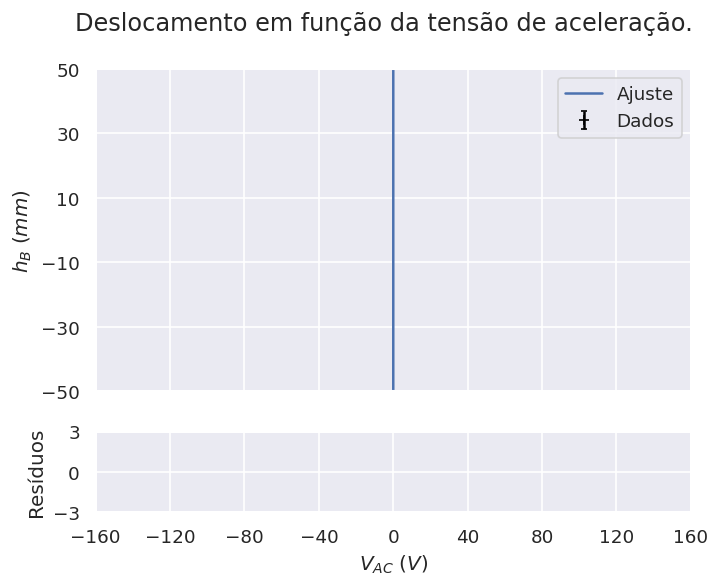

In [351]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={ 'height_ratios': (4,1) })
plt.suptitle('Deslocamento em função da tensão de aceleração.')

axs[0].errorbar(
	x=xdata,
	y=ydata,
	yerr=sigma,
	fmt=' ', marker='+', color='black', capsize=2, label='Dados'
)

x = np.linspace(-160, 160, 1000)
y = func(x, popt[0], popt[1])

delta = t_crit * S_xy * np.sqrt(1 + 1 / N + (x - np.mean(xdata))**2 / S_xx )

sns.lineplot(x=x, y=y, ax=axs[0], label=f'Ajuste')
# axs[0].fill_between(x=x, y1=y-delta, y2=y+delta, color='blue', alpha=0.3)

axs[1].errorbar(
	x=xdata,
	y=data['Resíduos'],
	yerr=1,
	fmt=' ', marker='+', color='black', capsize=2, label='Dados'
)

axs[0].set(ylabel='$h_B$ ($mm$)', yticks=np.arange(-50, 51, 20), ylim=(-50, 50))
axs[1].set(xlabel='$V_{AC}$ ($V$)', ylabel='Resíduos', xlim=(-160, 160), ylim=(-3, 3), xticks=np.arange(-160, 161, 40), yticks=[-3, 0, 3])

axs[0].legend()

plt.savefig('plots/deflexao_fixa.png', dpi=300, bbox_inches='tight')
plt.show()

In [352]:
N

22

In [353]:
popt, np.sqrt(pcov)

/tmp/ipykernel_5423/2161760635.py:1: RuntimeWarning: invalid value encountered in sqrt
  popt, np.sqrt(pcov)


(array([ 7.82846356e+02, -7.56842636e-01]),
 array([[1.92756984,        nan],
        [       nan, 0.07558185]]))

In [354]:
chi2 = np.sum(np.power(data['Resíduos'], 2))
print(chi2)

0.6280500837191907


In [355]:
C  = popt[0] * R / Vd
sC = np.sqrt( pcov[0][0] * (R / Vd)**2 + sR**2 * (popt[0] / Vd)**2 + sVd**2 * (popt[0] * R / Vd**2)**2 )

C, sC

(12086.383987573296, 311.2893286214414)